In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date, timedelta
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

2023-07-31 14:13:04.746521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 14:13:04.905560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 14:13:04.905592: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 14:13:05.462955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import pandas as pd
import json

with open("tweet_ICWSM.json") as f:
    data = []
    for line in f:
        json_data = json.loads(line)
        data.append(json_data)

df = pd.DataFrame(data)

In [3]:
df.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Fri May 25 17:07:16 +0000 2018,1000060743755223043,1000060743755223043,@newsjean I am a producer for AlJazeera Englis...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,16745666.0,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri May 25 14:35:24 +0000 2018,1000022526347612161,1000022526347612161,Why Trump scrapping the summit goes beyond the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri May 25 17:34:20 +0000 2018,1000067557095870464,1000067557095870464,Environmental red tape stalls border agents tr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat May 26 04:44:55 +0000 2018,1000236313793085441,1000236313793085441,Just what we don't need - an even dirtier futu...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat May 26 01:48:17 +0000 2018,1000191862953660416,1000191862953660416,Amazon Alexa records and shares woman's privat...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.facebook.com/twitter"" rel=...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

created_at                    object
id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
possibly_sensitive            object
lang                          object
retweeted_status              object
extended_entities             object
quoted_status_id             float64
q

In [5]:
df0= df['id']

In [6]:
df0.count()

722685

In [7]:
df_retweets = df['retweet_count']

In [8]:
df_retweets.head()

0    0
1    0
2    0
3    0
4    0
Name: retweet_count, dtype: int64

In [9]:
df.count()

created_at                   722685
id                           722685
id_str                       722685
text                         722685
truncated                    722685
entities                     722685
source                       722685
in_reply_to_status_id          8391
in_reply_to_status_id_str      8391
in_reply_to_user_id           12192
in_reply_to_user_id_str       12192
in_reply_to_screen_name       12192
user                         722685
geo                             176
coordinates                     176
place                          8770
contributors                      0
is_quote_status              722685
retweet_count                722685
favorite_count               722685
favorited                    722685
retweeted                    722685
possibly_sensitive           521371
lang                         722685
retweeted_status             278908
extended_entities             18886
quoted_status_id               4246
quoted_status_id_str        

In [10]:
df1=df['entities']

In [11]:
expanded_urls = df['entities'].apply(lambda x: (x['urls'][0]['expanded_url'] if len(x['urls'])> 0 else pd.NA))
expanded_urls = expanded_urls[expanded_urls.notna()]

In [12]:
#expanded_urls.tolist()

In [13]:
df['expanded_urls']=expanded_urls

In [14]:
df_body=[]
for i in df.index:
    df_body.append(df["text"][i])


In [15]:
print(len(df_body))

722685


In [16]:
import re

In [17]:
df_text_without_urls =[]
for x in df_body:
    y= re.sub('http://\S+|https://\S+', '', x)
    if(len(y)>0):
        df_text_without_urls.append(y)
    

In [18]:
print(len(df_text_without_urls))

722685


In [19]:
df_text_without_urls_filtered =[]
for x in df_text_without_urls:
    new_str = re.sub(r'[^\w\s]', '', x)
    new_str = new_str.replace("\n\r\n", "")
    new_str = new_str.replace("\n","")
    new_str = new_str.replace("\n\n","")
    df_text_without_urls_filtered.append(new_str)

In [20]:
print(len(df_text_without_urls_filtered))

722685


In [21]:
df['text_without_urls']= df_text_without_urls_filtered

In [22]:
df_required=df[['created_at','expanded_urls','text_without_urls']]

In [23]:
df_required.head()

,created_at,expanded_urls,text_without_urls
0,Fri May 25 17:07:16 +0000 2018,https://twitter.com/i/web/status/1000060743755...,newsjean I am a producer for AlJazeera English...
1,Fri May 25 14:35:24 +0000 2018,http://www.foxnews.com/politics/2018/05/25/why...,Why Trump scrapping the summit goes beyond the...
2,Fri May 25 17:34:20 +0000 2018,http://www.foxnews.com/politics/2018/05/25/env...,Environmental red tape stalls border agents tr...
3,Sat May 26 04:44:55 +0000 2018,https://twitter.com/i/web/status/1000236313793...,Just what we dont need an even dirtier future...
4,Sat May 26 01:48:17 +0000 2018,http://www.foxnews.com/tech/2018/05/24/amazon-...,Amazon Alexa records and shares womans private...


In [24]:
data2=pd.DataFrame(pd.read_excel("MediaBias.xlsx"))

In [25]:
data3 = data2[['Media source', 'URL', 'Political Leaning']].copy()

In [26]:
#SPLITTING THE ENTIRE DATASET OF MEDIABIAS INTO LEFT,CENTRE AND RIGHT

In [27]:
left_media=[]
right_media=[]
centre_media=[]
left_lean_media=[]
right_lean_media=[]

In [28]:
data3.rename(columns = {'Media source':'Media_source', 'Political Leaning':'Political_Leaning'}, inplace = True)
data3.Media_source = data3.Media_source.astype('string')
data3.Political_Leaning=data3.Political_Leaning.astype('string')
data3.URL=data3.URL.astype('string')

In [29]:
data3.dropna(inplace=True)

In [30]:
data3.head()

,Media_source,URL,Political_Leaning
0,ABC News (Online),https://abcnews.go.com/,Left Lean
1,Above The Law,https://abovethelaw.com/,Left Lean
2,Abridge News,https://abridgenews.com/,Mixed
3,AJ+,https://www.ajplus.net/,Left
4,Al Jazeera,https://www.aljazeera.com/,Left Lean


In [31]:
for ind in data3.index:
    if(data3['Political_Leaning'][ind]=="Left"):
        if(data3['Media_source'][ind] not in left_media):
            left_media.append(data3['Media_source'][ind])
    elif(data3['Political_Leaning'][ind]=="Right"):
        if(data3['Media_source'][ind] not in right_media):
            right_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Center" ) or (data3['Political_Leaning'][ind]=="Mixed")):
        if(data3['Media_source'][ind] not in centre_media):
            centre_media.append(data3['Media_source'][ind])
    elif(data3['Political_Leaning'][ind]=="Left Lean"):
        if(data3['Media_source'][ind] not in left_lean_media):
            left_lean_media.append((data3['Media_source'][ind]))
    elif(data3['Political_Leaning'][ind]=="Right Lean"):
        if(data3['Media_source'][ind] not in right_lean_media):
            right_lean_media.append((data3['Media_source'][ind]))
    

In [32]:
hashmap_media={}

In [33]:
for ind in data3.index:
    hashmap_media[data3['Media_source'][ind]]=data3['URL'][ind]

In [34]:
import re

In [35]:
df_required.isnull().values.any()

True

In [36]:
df_required.dtypes

created_at           object
expanded_urls        object
text_without_urls    object
dtype: object

In [37]:
print(len(left_lean_media))
print(len(right_lean_media))
print(len(left_media))
print(len(right_media))

95
47
54
50


In [38]:
left_suburls=[]
right_suburls=[]
centre_suburls=[]
left_leaning_suburls=[]
right_leaning_suburls=[]

In [39]:
for i in range(0,len(left_media)):
    if hashmap_media.get(left_media[i]) not in left_suburls:
        left_suburls.append(hashmap_media.get(left_media[i]))

In [40]:
for i in range(0,len(right_media)):
    if hashmap_media.get(right_media[i]) not in right_suburls:
        right_suburls.append(hashmap_media.get(right_media[i]))

In [41]:
for i in range(0,len(centre_media)):
    if hashmap_media.get(centre_media[i]) not in centre_suburls:
        centre_suburls.append(hashmap_media.get(centre_media[i]))

In [42]:
for i in range(0,len(left_lean_media)):
    if hashmap_media.get(left_lean_media[i]) not in left_leaning_suburls:
        left_leaning_suburls.append(hashmap_media.get(left_lean_media[i]))

In [43]:
for i in range(0,len(right_lean_media)):
    if hashmap_media.get(right_lean_media[i]) not in right_leaning_suburls:
        right_leaning_suburls.append(hashmap_media.get(right_lean_media[i]))

In [44]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps=[]
right_leaning_timestamps=[]

In [45]:
x=df_required[["created_at","expanded_urls","text_without_urls"]].to_numpy()

In [46]:
print(x)
print(len(x))
print(type(x[1]))
left=np.array(left_suburls)

[['Fri May 25 17:07:16 +0000 2018'
  'https://twitter.com/i/web/status/1000060743755223043'
  'newsjean I am a producer for AlJazeera Englishs AJStream Doing a show on North Korea this coming Tuesday May 29t ']
 ['Fri May 25 14:35:24 +0000 2018'
  'http://www.foxnews.com/politics/2018/05/25/why-trump-scrapping-summit-goes-beyond-rough-rhetoric.html'
  'Why Trump scrapping the summit goes beyond the rough rhetoric']
 ['Fri May 25 17:34:20 +0000 2018'
  'http://www.foxnews.com/politics/2018/05/25/environmental-red-tape-stalls-border-agents-trying-to-fill-drug-smuggler-tunnels.html'
  'Environmental red tape stalls border agents trying to fill drugsmuggler tunnels']
 ...
 ['Wed Sep 19 01:24:15 +0000 2018' nan
  'RT ACmideast The Saudiled coalition relaunches major offensive in Yemen to recapture the port city of Hodeidahthrough which 70 of hum']
 ['Tue Sep 18 14:31:37 +0000 2018'
  'https://www.voanews.com/a/senior-boko-haram-leader-reportedly-killed-by-allies-/4576033.html'
  'RT HarunMa

In [47]:
from datetime import datetime
for y in x:
    for sub  in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                #y[0] = str(y[0])
                y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(y[0].date(),y[2])
                left_timestamps.append(tuple_timestamp_text)

In [48]:
for y in x:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                #y[0] = str(y[0])
                y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(y[0].date(),y[2])
                centre_timestamps.append(tuple_timestamp_text)

In [49]:
try_formats = [
    '%Y-%m-%d %H:%M:%S%z', 
    '%a %b %d %H:%M:%S %z %Y', 
    '%m/%d/%Y %H:%M:%S', 
]


In [50]:
for y in x:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                right_timestamps.append(tuple_timestamp_text)

In [51]:
for y in x:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                left_leaning_timestamps.append(tuple_timestamp_text)

In [52]:
for y in x:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                right_leaning_timestamps.append(tuple_timestamp_text)

In [53]:
print(len(left_timestamps))
print(len(right_timestamps))
print(len(centre_timestamps))
print(len(left_leaning_timestamps))
print(len(right_leaning_timestamps))


35554
7227
43129
104630
3695


In [54]:
left_hashmap  ={}
right_hashmap ={}
centre_hashmap={}
left_lean_hashmap={}
right_lean_hashmap={}

In [55]:
left_timestamps[0]

(datetime.date(2018, 5, 26), 'RT chrislhayes Please watch this and share it ')

In [56]:
for t in left_timestamps:
    if(t[0] not in left_hashmap):
        left_hashmap[t[0]] = []
    left_hashmap[t[0]].append(t[1])

In [57]:
for t in right_timestamps:
    if(t[0] not in right_hashmap):
        right_hashmap[t[0]] = []
    right_hashmap[t[0]].append(t[1])

In [58]:
for t in centre_timestamps:
    if(t[0] not in centre_hashmap):
        centre_hashmap[t[0]] = []
    centre_hashmap[t[0]].append(t[1])

In [59]:
for t in left_leaning_timestamps:
    if(t[0] not in left_lean_hashmap):
        left_lean_hashmap[t[0]] = []
    left_lean_hashmap[t[0]].append(t[1])

In [60]:
for t in right_leaning_timestamps:
    if(t[0] not in right_lean_hashmap):
        right_lean_hashmap[t[0]] = []
    right_lean_hashmap[t[0]].append(t[1])

In [61]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [62]:
 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict




In [63]:
left_cache={}
right_cache={}
centre_cache={}
left_lean_cache={}
right_lean_cache={}

In [64]:
for t in left_hashmap:
    #print(t)
    if t not in left_cache:
        left_cache[t] =[]
    
    for text in left_hashmap[t]:
        left_cache[t].append(sentiment_scores(text))

In [65]:
for t in right_hashmap:
    #print(t)
    if t not in right_cache:
        right_cache[t] =[]
    
    for text in right_hashmap[t]:
        right_cache[t].append(sentiment_scores(text))

In [66]:
for t in centre_hashmap:
    #print(t)
    if t not in centre_cache:
        centre_cache[t] =[]
   
    for text in centre_hashmap[t]:
        centre_cache[t].append(sentiment_scores(text))

In [67]:
for t in left_lean_hashmap:
    #print(t)
    if t not in left_lean_cache:
        left_lean_cache[t] =[]
    
    for text in left_lean_hashmap[t]:
        left_lean_cache[t].append(sentiment_scores(text))

In [68]:
for t in right_lean_hashmap:
    #print(t)
    if t not in right_lean_cache:
        right_lean_cache[t] =[]
    
    for text in right_lean_hashmap[t]:
        right_lean_cache[t].append(sentiment_scores(text))

In [69]:
#negatives stacked plot.

In [70]:
left_negatives={}
right_negatives={}
centre_negatives={}
left_lean_negatives={}
right_lean_negatives={}

In [71]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    left_negatives[t] = average
    
    

In [72]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    right_negatives[t] = average
    

In [73]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    centre_negatives[t] = average
    

In [74]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    left_lean_negatives[t] = average
    

In [75]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    right_lean_negatives[t] = average
    

In [76]:
left_negatives1 = {'Date':left_negatives.keys(), 'negative_scores':left_negatives.values()}
right_negatives1 = {'Date':right_negatives.keys(), 'negative_scores':right_negatives.values()}
centre_negatives1 = {'Date':centre_negatives.keys(), 'negative_scores':centre_negatives.values()}
left_lean_negatives1 = {'Date':left_lean_negatives.keys(), 'negative_scores':left_lean_negatives.values()}
right_lean_negatives1 = {'Date':right_lean_negatives.keys(), 'negative_scores':right_lean_negatives.values()}


In [77]:
left_negatives_df = pd.DataFrame.from_dict(left_negatives1)
right_negatives_df = pd.DataFrame.from_dict(right_negatives1)
centre_negatives_df = pd.DataFrame.from_dict(centre_negatives1)
left_lean_negatives_df = pd.DataFrame.from_dict(left_lean_negatives1)
right_lean_negatives_df = pd.DataFrame.from_dict(right_lean_negatives1)

In [78]:
left_negatives_filtered_df= left_negatives_df[(left_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_negatives_df['Date']<=pd.Timestamp(2018,12,1))]

/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [79]:
right_negatives_filtered_df= right_negatives_df[(right_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
centre_negatives_filtered_df= centre_negatives_df[(centre_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_negatives_filtered_df= left_lean_negatives_df[(left_lean_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_negatives_filtered_df= right_lean_negatives_df[(right_lean_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_negatives_df['Date']<=pd.Timestamp(2018,12,1))]


In [80]:
merged_df = pd.merge(left_negatives_filtered_df, right_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_negatives_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873365/1042235266.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'negative_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_negatives_filtered_df, on='Date', how='inner')


In [81]:
merged_df

,Date,left_tweets_mean_negative_score,right_tweets_mean_negative_score,centre_tweets_mean_negative_score,left_leaning_tweets_mean_negative_score,right_leaning_tweets_mean_negative_score
0,2018-05-28,0.095235,0.106000,0.105846,0.104386,0.283400
1,2018-05-29,0.145892,0.000000,0.087372,0.120215,0.108000
2,2018-05-30,0.090342,0.256000,0.093321,0.094340,0.234875
3,2018-05-31,0.077864,0.140500,0.076113,0.081639,0.183000
4,2018-06-04,0.151143,0.111000,0.086921,0.070036,0.143000
...,...,...,...,...,...,...
122,2018-10-04,0.104282,0.119310,0.086613,0.121620,0.162576
123,2018-10-02,0.119052,0.119730,0.118570,0.105718,0.042071
124,2018-09-30,0.118065,0.157889,0.143173,0.117527,0.150261
125,2018-09-29,0.103187,0.058719,0.146847,0.117168,0.141875


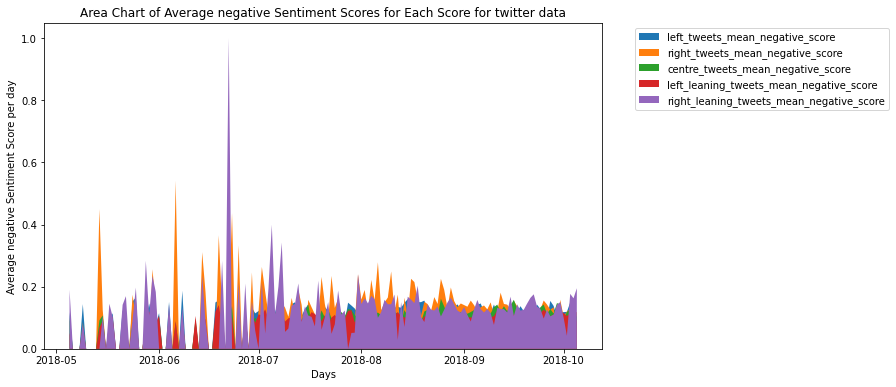

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average negative Sentiment Score per day')
plt.title('Area Chart of Average negative Sentiment Scores for Each Score for twitter data')
#plt.grid(True)
plt.show()


In [83]:
"""
plt.figure(figsize=(10, 6))  
plt.stackplot(grouped_df.index, grouped_df.values.T, labels=grouped_df.columns)


plt.xlabel('Months')
plt.ylabel('Average Negative Sentiment Scores per month')
plt.title('Monthly Negative Sentiment Scores for political leaned tweets')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()
"""

"\nplt.figure(figsize=(10, 6))  \nplt.stackplot(grouped_df.index, grouped_df.values.T, labels=grouped_df.columns)\n\n\nplt.xlabel('Months')\nplt.ylabel('Average Negative Sentiment Scores per month')\nplt.title('Monthly Negative Sentiment Scores for political leaned tweets')\n\n\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n\nplt.show()\n"

In [84]:
#positive stacked plot

In [85]:
left_positives={}
right_positives={}
centre_positives={}
left_lean_positives={}
right_lean_positives={}

In [86]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    left_positives[t] = average
    
    

In [87]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    right_positives[t] = average
    

In [88]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    centre_positives[t] = average
    

In [89]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    left_lean_positives[t] = average
    

In [90]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    right_lean_positives[t] = average
    

In [91]:
left_positives1 = {'Date':left_positives.keys(), 'positive_scores':left_positives.values()}
right_positives1 = {'Date':right_positives.keys(), 'positive_scores':right_positives.values()}
centre_positives1 = {'Date':centre_positives.keys(), 'positive_scores':centre_positives.values()}
left_lean_positives1 = {'Date':left_lean_positives.keys(), 'positive_scores':left_lean_positives.values()}
right_lean_positives1 = {'Date':right_lean_positives.keys(), 'positive_scores':right_lean_positives.values()}


In [92]:
left_positives_df = pd.DataFrame.from_dict(left_positives1)
right_positives_df = pd.DataFrame.from_dict(right_positives1)
centre_positives_df = pd.DataFrame.from_dict(centre_positives1)
left_lean_positives_df = pd.DataFrame.from_dict(left_lean_positives1)
right_lean_positives_df = pd.DataFrame.from_dict(right_lean_positives1)

In [93]:
left_positives_filtered_df= left_positives_df[(left_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_positives_df['Date']<=pd.Timestamp(2018,12,1))]
right_positives_filtered_df= right_positives_df[(right_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_positives_df['Date']<=pd.Timestamp(2018,12,1))]
centre_positives_filtered_df= centre_positives_df[(centre_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_positives_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_positives_filtered_df= left_lean_positives_df[(left_lean_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_positives_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_positives_filtered_df= right_lean_positives_df[(right_lean_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_positives_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [94]:
merged_df = pd.merge(left_positives_filtered_df, right_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_positives_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873365/1899825588.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'positive_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_positives_filtered_df, on='Date', how='inner')


In [95]:
merged_df

,Date,left_tweets_mean_positive_score,right_tweets_mean_positive_score,centre_tweets_mean_positive_score,left_leaning_tweets_mean_positive_score,right_leaning_tweets_mean_positive_score
0,2018-05-28,0.103824,0.190000,0.128462,0.079088,0.080800
1,2018-05-29,0.096324,0.123000,0.080814,0.057989,0.225500
2,2018-05-30,0.068105,0.238000,0.080714,0.077340,0.073250
3,2018-05-31,0.076636,0.061000,0.111452,0.080361,0.000000
4,2018-06-04,0.101886,0.059000,0.059556,0.113940,0.095500
...,...,...,...,...,...,...
122,2018-10-04,0.069493,0.083577,0.068146,0.068879,0.066242
123,2018-10-02,0.056896,0.053678,0.060879,0.079570,0.119857
124,2018-09-30,0.056000,0.080356,0.056643,0.072138,0.061870
125,2018-09-29,0.064336,0.193969,0.048458,0.084068,0.033125


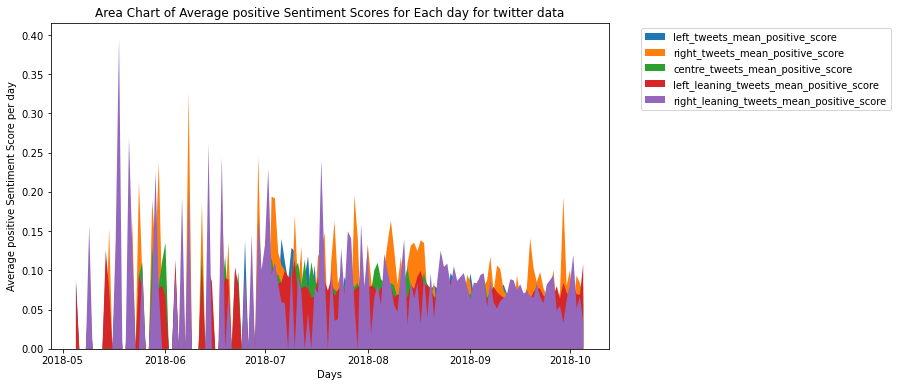

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average positive Sentiment Score per day')
plt.title('Area Chart of Average positive Sentiment Scores for Each day for twitter data')
#plt.grid(True)
plt.show()


In [97]:
"""
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Plot the area chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Average positive Sentiment Scores per month')
plt.title('Monthly positive Sentiment Scores for political leaned tweets')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()
"""

"\nmerged_df['Date'] = pd.to_datetime(merged_df['Date'])\n\nmonthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()\n\n# Plot the area chart\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\nplt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)\n\n# Set labels and title\nplt.xlabel('Months')\nplt.ylabel('Average positive Sentiment Scores per month')\nplt.title('Monthly positive Sentiment Scores for political leaned tweets')\n\n# Add legend\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Show the chart\nplt.show()\n"

In [98]:
#neutral score stacked plots

In [99]:
left_neutrals={}
right_neutrals={}
centre_neutrals={}
left_lean_neutrals={}
right_lean_neutrals={}

In [100]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    left_neutrals[t] = average
    
    

In [101]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    right_neutrals[t] = average
    

In [102]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    centre_neutrals[t] = average
    

In [103]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    left_lean_neutrals[t] = average
    

In [104]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    right_lean_neutrals[t] = average
    

In [105]:
left_neutrals1 = {'Date':left_neutrals.keys(), 'neutral_scores':left_neutrals.values()}
right_neutrals1 = {'Date':right_neutrals.keys(), 'neutral_scores':right_neutrals.values()}
centre_neutrals1 = {'Date':centre_neutrals.keys(), 'neutral_scores':centre_neutrals.values()}
left_lean_neutrals1 = {'Date':left_lean_neutrals.keys(), 'neutral_scores':left_lean_neutrals.values()}
right_lean_neutrals1 = {'Date':right_lean_neutrals.keys(), 'neutral_scores':right_lean_neutrals.values()}


In [106]:
left_neutrals_df = pd.DataFrame.from_dict(left_neutrals1)
right_neutrals_df = pd.DataFrame.from_dict(right_neutrals1)
centre_neutrals_df = pd.DataFrame.from_dict(centre_neutrals1)
left_lean_neutrals_df = pd.DataFrame.from_dict(left_lean_neutrals1)
right_lean_neutrals_df = pd.DataFrame.from_dict(right_lean_neutrals1)

In [107]:
left_neutrals_filtered_df= left_neutrals_df[(left_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (left_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
right_neutrals_filtered_df= right_neutrals_df[(right_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (right_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
centre_neutrals_filtered_df= centre_neutrals_df[(centre_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_neutrals_filtered_df= left_lean_neutrals_df[(left_lean_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_neutrals_filtered_df= right_lean_neutrals_df[(right_lean_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [108]:
merged_df = pd.merge(left_neutrals_filtered_df, right_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_neutrals_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873365/4213257282.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'neutral_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_neutrals_filtered_df, on='Date', how='inner')


In [109]:
merged_df

,Date,left_tweets_mean_neutral_score,right_tweets_mean_neutral_score,centre_tweets_mean_neutral_score,left_leaning_tweets_mean_neutral_score,right_leaning_tweets_mean_neutral_score
0,2018-05-28,0.800941,0.704000,0.765615,0.816526,0.635800
1,2018-05-29,0.757757,0.877000,0.831791,0.821817,0.666500
2,2018-05-30,0.841553,0.507000,0.825976,0.828320,0.691875
3,2018-05-31,0.845500,0.798500,0.812468,0.837969,0.817000
4,2018-06-04,0.747000,0.830000,0.853540,0.816060,0.761500
...,...,...,...,...,...,...
122,2018-10-04,0.826239,0.797122,0.845258,0.809512,0.771182
123,2018-10-02,0.824042,0.826609,0.820543,0.814699,0.838071
124,2018-09-30,0.825935,0.761756,0.800194,0.810350,0.787826
125,2018-09-29,0.832469,0.747344,0.804708,0.798773,0.825000


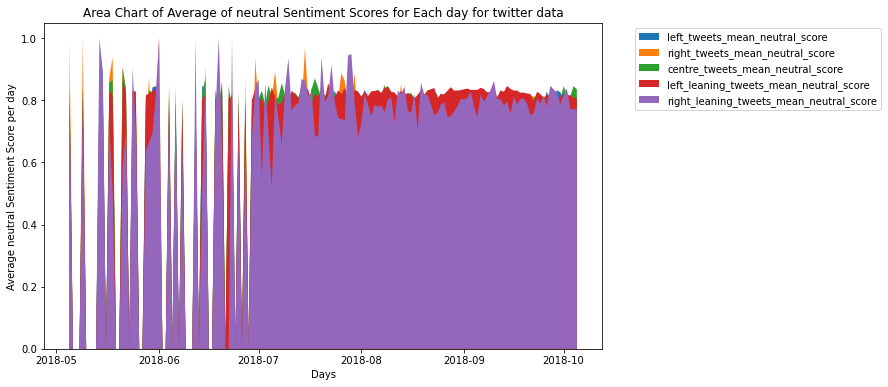

In [110]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average neutral Sentiment Score per day')
plt.title('Area Chart of Average of neutral Sentiment Scores for Each day for twitter data')
#plt.grid(True)
plt.show()


In [111]:
"""
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Plot the area chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Average neutral Sentiment Scores per month')
plt.title('Monthly neutral Sentiment Scores for political leaned tweets')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()
"""

"\nmerged_df['Date'] = pd.to_datetime(merged_df['Date'])\n\nmonthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()\n\n# Plot the area chart\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\nplt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)\n\n# Set labels and title\nplt.xlabel('Months')\nplt.ylabel('Average neutral Sentiment Scores per month')\nplt.title('Monthly neutral Sentiment Scores for political leaned tweets')\n\n# Add legend\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Show the chart\nplt.show()\n"

In [112]:
#Stacked Compound score for twitter data

In [113]:
left_compounds={}
right_compounds={}
centre_compounds={}
left_lean_compounds={}
right_lean_compounds={}


In [114]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    left_compounds[t] = average
    

In [115]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    right_compounds[t] = average
    

In [116]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    centre_compounds[t] = average
    

In [117]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    left_lean_compounds[t] = average
    

In [118]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    right_lean_compounds[t] = average
    

In [119]:
left_compounds1 = {'Date':left_compounds.keys(), 'compound_scores':left_compounds.values()}
right_compounds1 = {'Date':right_compounds.keys(), 'compound_scores':right_compounds.values()}
centre_compounds1 = {'Date':centre_compounds.keys(), 'compound_scores':centre_compounds.values()}
left_lean_compounds1 = {'Date':left_lean_compounds.keys(), 'compound_scores':left_lean_compounds.values()}
right_lean_compounds1 = {'Date':right_lean_compounds.keys(), 'compound_scores':right_lean_compounds.values()}


In [120]:
left_compounds_df = pd.DataFrame.from_dict(left_compounds1)
right_compounds_df = pd.DataFrame.from_dict(right_compounds1)
centre_compounds_df = pd.DataFrame.from_dict(centre_compounds1)
left_lean_compounds_df = pd.DataFrame.from_dict(left_lean_compounds1)
right_lean_compounds_df = pd.DataFrame.from_dict(right_lean_compounds1)

In [121]:
left_compounds_filtered_df= left_compounds_df[(left_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (left_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
right_compounds_filtered_df= right_compounds_df[(right_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (right_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
centre_compounds_filtered_df= centre_compounds_df[(centre_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_compounds_filtered_df= left_lean_compounds_df[(left_lean_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_compounds_filtered_df= right_lean_compounds_df[(right_lean_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_compounds_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [122]:
merged_df = pd.merge(left_compounds_filtered_df, right_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_compounds_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873365/3926434668.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'compound_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_compounds_filtered_df, on='Date', how='inner')


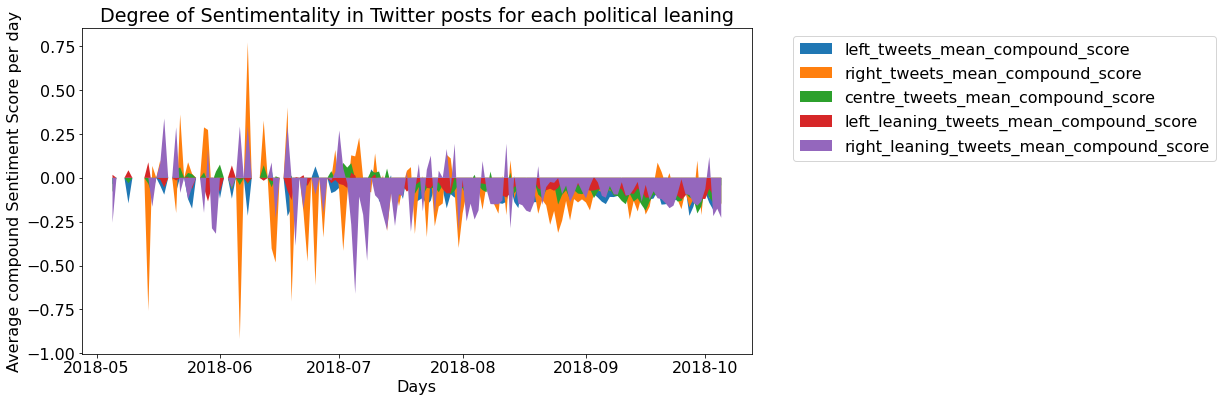

In [123]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'
for score in ['left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average compound Sentiment Score per day')
plt.title('Degree of Sentimentality in Twitter posts for each political leaning')

#plt.ylim(0, 1)
#plt.grid(True)
plt.show()


In [124]:
plt.savefig('5.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [125]:
merged_df

,left_tweets_mean_compound_score,right_tweets_mean_compound_score,centre_tweets_mean_compound_score,left_leaning_tweets_mean_compound_score,right_leaning_tweets_mean_compound_score
Date,,,,,
2018-05-28,0.006947,0.287800,0.030908,-0.057095,-0.199220
2018-05-29,-0.059232,0.273200,-0.026247,-0.134251,0.164450
2018-05-30,-0.057489,-0.118900,-0.028123,-0.046551,-0.287425
2018-05-31,0.024409,-0.220700,0.035650,-0.020823,-0.318450
2018-06-04,-0.118511,-0.063633,-0.063257,0.071124,-0.058250
...,...,...,...,...,...
2018-10-04,-0.071371,-0.116811,-0.036398,-0.089364,-0.175615
2018-10-02,-0.142215,-0.117376,-0.109867,-0.062019,0.119300
2018-09-30,-0.081535,-0.212324,-0.162505,-0.119497,-0.133870


In [126]:
positives =0;
for index, row in merged_df.iterrows():
    if row['left_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['right_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['centre_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['left_leaning_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['right_leaning_tweets_mean_compound_score']>0 :
        positives+=1
print(positives)
    

105


In [127]:
print(merged_df.to_string())

            left_tweets_mean_compound_score  right_tweets_mean_compound_score  centre_tweets_mean_compound_score  left_leaning_tweets_mean_compound_score  right_leaning_tweets_mean_compound_score
Date                                                                                                                                                                                               
2018-05-28                         0.006947                          0.287800                           0.030908                                -0.057095                                 -0.199220
2018-05-29                        -0.059232                          0.273200                          -0.026247                                -0.134251                                  0.164450
2018-05-30                        -0.057489                         -0.118900                          -0.028123                                -0.046551                                 -0.287425
2018-05-31          